## FBI Gun Data Project

Description of FBI Gun Data

           The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.
    The NICS data is found in one sheet of an .xlsx file(converted to a .csv file). It contains the number of firearm checks by month, state, and type.
    The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

Asked Questions

- Which states have had the highest growth in gun registrations? 
- What is the overall trend for gun purchases?
- What is the trend of different categories of guns?
- How are gun purchases and total permits correlated?



In [1]:
# import library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Load the Datasets
# df1 = gun_data dataframe

df1 = pd.read_csv('gun_data.csv')

CLEANING FOCUS ON df1

In [4]:
# Assess the first four rows of df1
df1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [6]:
# Assess Columns and datatypes in df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [8]:
# Check Missing Values
df1.isnull().sum().sum()

154595

In [11]:
# Fill df1 Missing Values with the Mean of each columns in int data type
df1.fillna(value = df1[['permit', 'permit_recheck', 'handgun', 'long_gun',
       'other','admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']].mean().astype(int),inplace=True) 

In [13]:
# Confirm Missing Values in df1
df1.isnull().sum().sum()

0

In [16]:
# Check for Dulicated Values in df1
sum(df1.duplicated())

0

In [18]:
# Define a function 
def get_month(month):
# Return the second  set of values separated by "-"
    return month.split('-')[1]
# Create a new column[Month] that contain these values
df1['Month'] = df1['month'].apply(lambda x: get_month(x))
# Confirm this change
df1.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,09


In [19]:
# Define a function
def get_year(month):
# Return the first set of values separated by "-"
    return month.split('-')[0]
# Create a new column[Year] that contain these values
df1['Year'] = df1['month'].apply(lambda x: get_year(x))
# Confirm this change
df1.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,Month,Year
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,09,2017


In [20]:
# Drop df1['month'] after successfully separating its data
df1.drop(['month'],axis=1,inplace=True)

In [21]:
# Re-arranging columns in df1
columns = ['state','Year','Month', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals']

In [22]:
df1 = df1[columns]

In [23]:
# Confirm the change in df1
df1.head(1)

,state,Year,Month,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,Alabama,2017,09,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [24]:
# Fix the data type in df1
columns = ['Year','Month','permit', 'permit_recheck', 'handgun', 'long_gun','other','multiple','admin', 'prepawn_handgun', 'prepawn_long_gun','prepawn_other', 'redemption_handgun', 'redemption_long_gun','redemption_other','returned_handgun','returned_long_gun','returned_other', 'rentals_handgun', 'rentals_long_gun','private_sale_handgun', 'private_sale_long_gun', 'private_sale_other','return_to_seller_handgun', 'return_to_seller_long_gun','return_to_seller_other']
for fix in columns:
    df1[fix] = df1[fix].astype(int)

In [26]:
# Confirm the data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      12485 non-null  object
 1   Year                       12485 non-null  int32 
 2   Month                      12485 non-null  int32 
 3   permit                     12485 non-null  int32 
 4   permit_recheck             12485 non-null  int32 
 5   handgun                    12485 non-null  int32 
 6   long_gun                   12485 non-null  int32 
 7   other                      12485 non-null  int32 
 8   multiple                   12485 non-null  int32 
 9   admin                      12485 non-null  int32 
 10  prepawn_handgun            12485 non-null  int32 
 11  prepawn_long_gun           12485 non-null  int32 
 12  prepawn_other              12485 non-null  int32 
 13  redemption_handgun         12485 non-null  int32 
 14  redemp

In [27]:
# Drop columns irrelevant to our analysis
df1.drop(['permit_recheck','multiple', 'admin', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other','totals'],axis=1,inplace=True)

In [28]:
# Confirm!!
df1.head(1)

,state,Year,Month,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other
0,Alabama,2017,9,16717,5734,6320,221,15,21,2,1378,1262,1


In [29]:
# Add column,suming all columns with gun
df1['total'] = df1.iloc[:,4:13].sum(axis=1)

In [34]:
# Confirm!!
df1.head(1)

,state,Year,Month,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,total
0,Alabama,2017,9,16717,5734,6320,221,15,21,2,1378,1262,1,14954


CLEANING FOCUS ON df2

In [39]:
# Load dataset df2
df2 = pd.read_csv('U.S. Census Data.csv')

In [40]:
df2

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Check for Missing Values
df2.isnull().sum().sum()

1062

In [42]:
# Drop Column irrelevant to our analysis
df2.drop(['Fact Note'],axis=1,inplace=True)

In [43]:
# Locate Rows relevant to our analysis using their indexes and reassign it to df2
df2 = df2.iloc[[0,8,9,12,13,14,15,16,18], :]

In [44]:
# Confirm Missing Values
df2.isnull().sum().sum()

0

In [45]:
# Check for Duplicated Values
sum(df2.duplicated())

0

In [75]:
# Rename column to be relevant to our analysis
df2.rename(columns={'Fact':'state'})

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)"
0,"4,863,300",16.10%,13.80%,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%
1,"741,894",10.40%,7.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%
2,"6,931,071",16.90%,13.80%,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%
3,"2,988,248",16.30%,14.40%,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%
4,"39,250,017",13.60%,11.40%,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%
5,"5,540,545",13.40%,10.90%,87.50%,4.50%,1.60%,3.30%,0.20%,21.30%
6,"3,576,452",16.10%,14.20%,80.60%,11.80%,0.50%,4.70%,0.10%,15.70%
7,"952,065",17.50%,14.40%,70.10%,22.60%,0.60%,4.00%,0.10%,9.20%
8,"20,612,439",19.90%,17.30%,77.60%,16.80%,0.50%,2.90%,0.10%,24.90%
9,"10,310,371",13.10%,10.70%,61.20%,32.00%,0.50%,4.10%,0.10%,9.40%


In [51]:
# Interchange rows with columns 
df2.set_index('state',inplace=True)
df2 = df2.T

In [52]:
# Confirm the change
df2.head(2)

state,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)"
Alabama,"4,863,300",16.10%,13.80%,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%
Alaska,"741,894",10.40%,7.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%


CHECKPOINT

In [53]:
# Save the cleaned datasets
df1.to_csv('clean_gun_data.csv',index=False)
df2.to_csv('clean_U.S Census_data.csv',index=False)

EXPLORATORY DATA ANALYSIS

In [2]:
# Load the cleaned datasets
df1 = pd.read_csv('clean_gun_data.csv')
df2 = pd.read_csv('clean_U.S Census_data.csv')

In [56]:
df1.head()

,state,Year,Month,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,total
0,Alabama,2017,9,16717,5734,6320,221,15,21,2,1378,1262,1,14954
1,Alaska,2017,9,209,2320,2930,219,5,2,0,200,154,2,5832
2,Arizona,2017,9,5069,11063,7946,920,13,6,0,1474,748,3,22173
3,Arkansas,2017,9,2935,4347,6063,165,12,13,0,1296,1824,4,13724
4,California,2017,9,57839,37165,24581,2984,0,0,0,535,397,5,65667


In [57]:
df2.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)"
0,"4,863,300",16.10%,13.80%,69.30%,26.80%,0.70%,1.40%,0.10%,4.20%
1,"741,894",10.40%,7.70%,66.10%,3.80%,15.20%,6.30%,1.30%,7.00%
2,"6,931,071",16.90%,13.80%,83.30%,4.90%,5.40%,3.40%,0.30%,30.90%
3,"2,988,248",16.30%,14.40%,79.40%,15.70%,1.00%,1.60%,0.30%,7.30%
4,"39,250,017",13.60%,11.40%,72.70%,6.50%,1.70%,14.80%,0.50%,38.90%


In [58]:
P = df1.groupby('Year').sum()
P

,Month,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,total
Year,,,,,,,,,,,,
1998,1265,84582,225939,590601,39600,440,770,0,44770,65890,110,968120
1999,4290,1082591,2578318,5272121,237600,2640,4620,0,268620,395340,660,8759919
2000,4290,1227814,2191879,4779978,237600,2640,4620,0,268620,395340,660,7881337
2001,4290,1408338,2167213,4943375,237600,3258,6731,0,228464,368827,660,7956128
2002,4290,1363211,1845112,4409311,237600,5086,11094,0,171458,392976,660,7073297
2003,4290,1409909,1857018,4390867,237600,5150,8663,0,182334,400301,660,7082593
2004,4290,1352085,1996400,4514657,237600,3951,6473,0,182946,391625,660,7334312
2005,4290,1427149,2301140,4654752,237600,3203,5880,0,188000,382891,660,7774126
2006,4290,2050279,2441325,4789591,237600,3146,5924,0,186385,356850,660,8021481


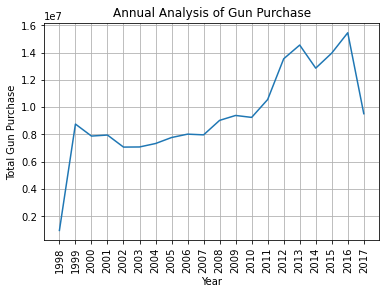

In [59]:
Years =  [year for year, df1 in df1.groupby('Year')]
plt.title('Annual Analysis of Gun Purchase')
plt.plot(Years,P['total'])
plt.xticks(Years,rotation='vertical')
plt.xlabel('Year')
plt.ylabel('Total Gun Purchase')
plt.grid()
plt.show()

Background Checks was officially launched in 1998 and since then,there is a steady progressing of gun purchase through the years. We noticed gun was less purchased in 2014 compared to 2 years before because there was an amended regulation in 2014 which ultimately causes the sudden change. This was also noticed in 2017..

In [60]:
M = df1.groupby('Month').sum()
M

,Year,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,total
Month,,,,,,,,,,,,
1,2098360,7383226,6517686,7254588,387653,5149,9072,83,426007,606437,1506,15208181
2,2098360,7133595,7586539,7793691,385808,5201,8631,87,567573,834802,1543,17183875
3,2098360,8319119,7404506,8143436,393976,4894,7792,49,411496,585373,1340,16952862
4,2098360,7163118,6133381,6718990,368096,4678,7199,98,380509,524890,1261,14139102
5,2098360,6579192,5450685,5623974,351119,4702,7096,53,394509,510776,1272,12344186
6,2098360,6404239,5299814,5568488,348504,4694,7079,61,408672,523075,1324,12161711
7,2098360,6433399,5253951,5683715,354043,4840,7224,58,418274,542416,1329,12265850
8,2098360,6254341,5572592,7532225,349166,4904,7593,62,433151,614769,1412,14515874
9,2098360,6104771,5388650,8568621,347132,5046,7655,79,441867,671077,1457,15431584


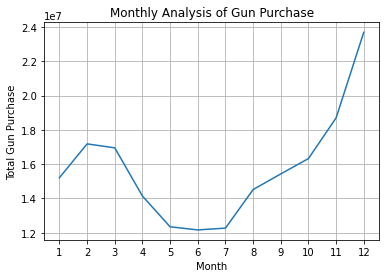

In [61]:
Months =  [month for month, df1 in df1.groupby('Month')]
plt.title('Monthly Analysis of Gun Purchase')
plt.plot(Months,M['total'])
plt.xticks(Months)
plt.xlabel('Month')
plt.ylabel('Total Gun Purchase')
plt.grid()
plt.show()

Guns are purchased the most in December maybe because of its a festive period and it is least purchased in May,June,July..

In [62]:
result = df1.groupby('Year').sum()
result

,Month,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,total
Year,,,,,,,,,,,,
1998,1265,84582,225939,590601,39600,440,770,0,44770,65890,110,968120
1999,4290,1082591,2578318,5272121,237600,2640,4620,0,268620,395340,660,8759919
2000,4290,1227814,2191879,4779978,237600,2640,4620,0,268620,395340,660,7881337
2001,4290,1408338,2167213,4943375,237600,3258,6731,0,228464,368827,660,7956128
2002,4290,1363211,1845112,4409311,237600,5086,11094,0,171458,392976,660,7073297
2003,4290,1409909,1857018,4390867,237600,5150,8663,0,182334,400301,660,7082593
2004,4290,1352085,1996400,4514657,237600,3951,6473,0,182946,391625,660,7334312
2005,4290,1427149,2301140,4654752,237600,3203,5880,0,188000,382891,660,7774126
2006,4290,2050279,2441325,4789591,237600,3146,5924,0,186385,356850,660,8021481


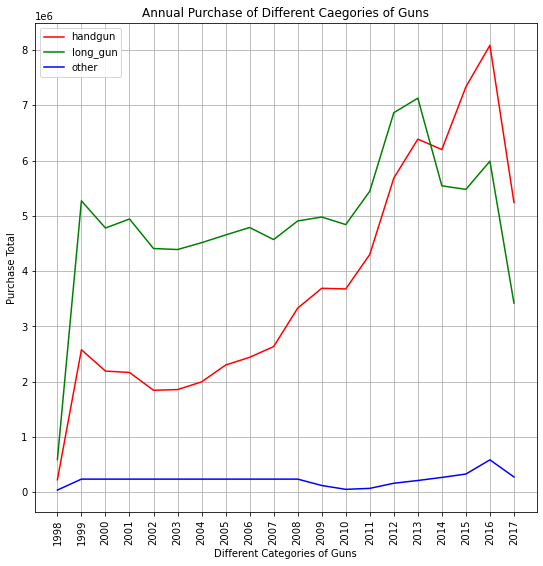

In [63]:
x =  [year for year, df1 in df1.groupby('Year')]
y = result['handgun']
z = result['long_gun']
k = result['other']

plt.figure(figsize=(9,9))
plt.plot(x, y, color='r', label='handgun')
plt.plot(x, z, color='g', label='long_gun')
plt.plot(x, k, color='b', label='other')

plt.xticks(x,rotation='vertical')
plt.xlabel("Different Categories of Guns")
plt.ylabel("Purchase Total")
plt.title("Annual Purchase of Different Caegories of Guns")

plt.legend()
plt.grid()

plt.show()

Over the years, we can see there's a preference for Long guns except in 2016 where hand gun made more purchases. Other kinds of gun has been relatively low in purchases compared to others..

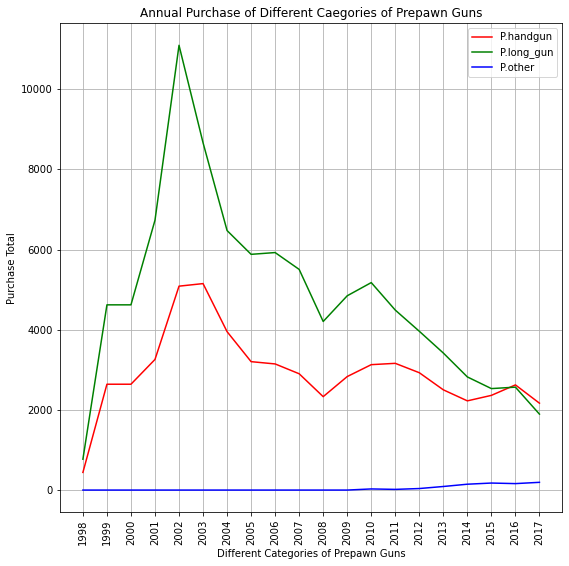

In [64]:
x =  [year for year, df1 in df1.groupby('Year')]
y = result['prepawn_handgun']
z = result['prepawn_long_gun']
k = result['prepawn_other']

plt.figure(figsize=(9,9))
plt.plot(x, y, color='r', label='P.handgun')
plt.plot(x, z, color='g', label='P.long_gun')
plt.plot(x, k, color='b', label='P.other')

plt.xticks(x,rotation='vertical')
plt.xlabel("Different Categories of Prepawn Guns")
plt.ylabel("Purchase Total")
plt.title("Annual Purchase of Different Caegories of Prepawn Guns")

plt.legend()
plt.grid()

plt.show()

Over the years, we can see long guns has been pawned the most simply because it is preferred the most to hand guns and other guns maybe because its cheaper? We dont know for sure..

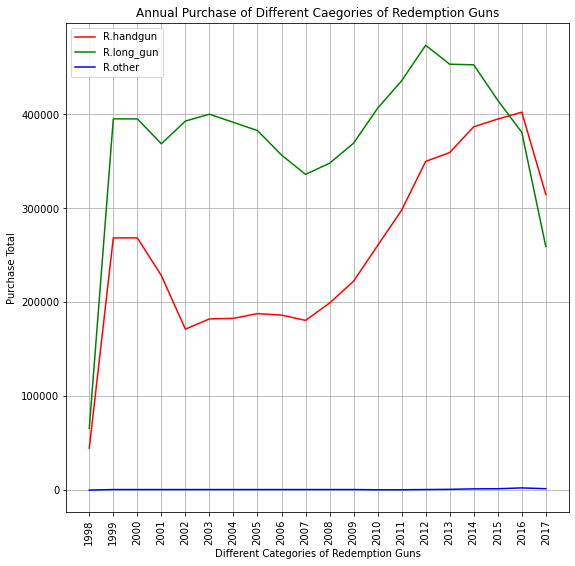

In [65]:
x =  [year for year, df1 in df1.groupby('Year')]
y = result['redemption_handgun']
z = result['redemption_long_gun']
k = result['redemption_other']

plt.figure(figsize=(9,9))
plt.plot(x, y, color='r', label='R.handgun')
plt.plot(x, z, color='g', label='R.long_gun')
plt.plot(x, k, color='b', label='R.other')

plt.xticks(x,rotation='vertical')
plt.xlabel("Different Categories of Redemption Guns")
plt.ylabel("Purchase Total")
plt.title("Annual Purchase of Different Caegories of Redemption Guns")

plt.legend()
plt.grid()

plt.show()

There's an high rate of redemption guns because its high in demand..

In [66]:
S = df1.groupby('state').sum()

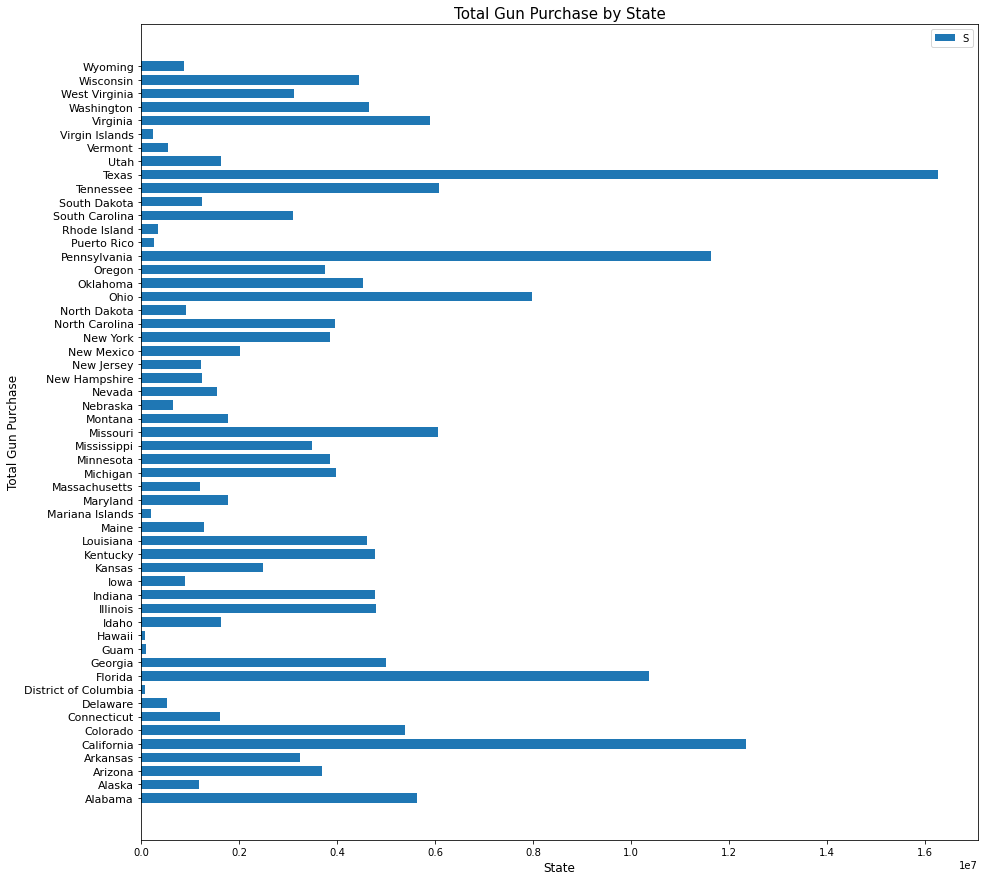

In [67]:
States=  [state for state, df1 in df1.groupby('state')]
plt.figure(figsize=(15,15))
plt.title('Total Gun Purchase by State',fontsize=15)
plt.barh(States,S['total'],height=.7)
plt.yticks(States,fontsize=11)
plt.xlabel('State',fontsize=12)
plt.ylabel('Total Gun Purchase',fontsize=12)
plt.legend('S')
plt.show()

We can categorically say that the top 5 states in gun purchase are; Texas, California, Pennsylvania, Florida and Ohio

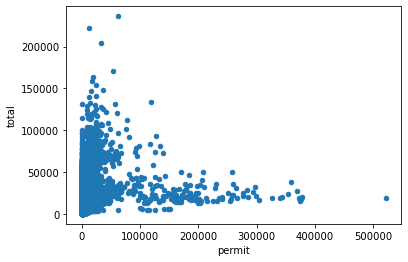

In [69]:
df1.plot(x='permit',y='total',kind='scatter')
plt.show()

As we can see in this graph, total gun purchase and its permit are positively correlated

In [3]:
df1.describe()

,Year,Month,permit,handgun,long_gun,other,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,total
count,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,2007.792952,6.484581,6413.628194,5940.879696,7810.846296,360.207769,4.699159,7.704205,0.067841,407.819624,599.280737,1.334001,15132.839327
std,5.468296,3.451944,23729.495816,8611.677589,9302.758891,895.634659,10.027534,15.133912,0.681467,720.023395,875.000360,2.955252,17044.165046
min,1998.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,3.000000,0.000000,868.000000,2079.000000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3995.000000
50%,2008.000000,6.000000,522.000000,3067.000000,5130.000000,360.000000,1.000000,3.000000,0.000000,147.000000,340.000000,1.000000,10183.000000
75%,2013.000000,9.000000,4338.000000,7277.000000,10374.000000,360.000000,4.000000,7.000000,0.000000,421.000000,670.000000,1.000000,19971.000000
max,2017.000000,12.000000,522188.000000,107224.000000,108058.000000,77929.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,79.000000,236353.000000


In [4]:
df1['total'].mean() - df1['permit'].mean()

8719.211133360031

Using summary statistics, 
1. Approximately 8719 guns was purchased without permit.
2. Long guns was purchased the most out of different categories of guns available.
3. Generally other kinds of guns are relatively low compared to others in its category.
4. There's also a preference for long guns in each category of guns which means they made more sales than the rest in their category.

LIMITATION

This analysis was limited as more analysis can be done to understand gun purchases in each state and their differences in relation to background check(permit).
The annual and monthly analysis of gun purchases per state.
The difference in prefernce of each category of gun by state.
Who are more likely to purchase guns?


CONCLUSION

   The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov. 
   My knowledge on data analysis has helped me to load and clean this data from its raw form that contains irrelevant columns,missing values and the irregularity in data type. 
   Explore and communicate interesting insights with different kind of plots and statistical inferences using Pandas,Numpy and Matplotlib. This has enable me to easily solve some interesting questions which was listed at the beginning of this analysis using fact from the data. Background Checks was officially launched in 1998 and since then,there is a steady progressing of gun purchase through the years. We noticed gun was less purchased in 2014 compared to 2 years before because there was an amended regulation in 2014 which ultimately causes the sudden change. This was also noticed in 2017,Over the years, we can see there's a preference for Long guns except in 2016 where hand gun made more purchases. Other kinds of gun has been relatively low in purchases compared to others.

REFERENCES

1. Stackoverflow
2. geeksforgeeks
3. pandas documentation